In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(tf.__version__)

2.18.0


In [9]:
observations=100000
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(low=-10, high=10, size=(observations,1))
inputs = np.column_stack((xs,zs))
print(inputs.shape)

(100000, 2)


In [10]:
noise = np.random.uniform(low=-1, high=1, size=(observations,1))
targets = 13*xs + 7*zs - 12 + noise
np.savez('TF_dataset', inputs=inputs, targets=targets)
print(targets.shape)

(100000, 1)


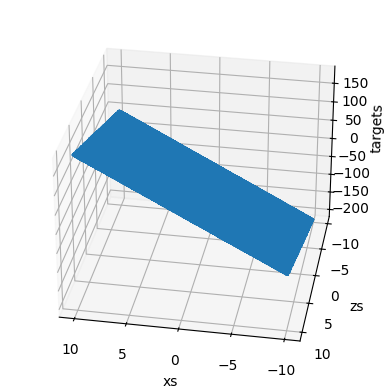

In [11]:
targets = targets.reshape(observations,)
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('targets')
ax.view_init(azim=100)
plt.show()

In [12]:
init_range = 0.1
weights = np.random.uniform(low=-init_range, high=init_range, size=(2,1))
biases = np.random.uniform(low=-init_range, high=init_range, size=1)
print(weights, biases)

[[0.07706707]
 [0.00592725]] [-0.08198863]


In [13]:
targets = targets.reshape(observations,1)
eta = 0.0001
for i in range (100):
  outputs = np.dot(inputs,weights) + biases
  deltas = outputs - targets
  loss = np.sum(deltas ** 2) / 2 / observations
  print(loss)

  deltas_scaled = deltas / observations
  weights = weights - eta * np.dot(inputs.T,deltas_scaled)
  biases = biases - eta * np.sum(deltas_scaled)


3662.3992780083563
3638.508086781972
3614.77565708499
3591.2009333131386
3567.78286688105
3544.5204161755937
3521.412546509509
3498.4582300753605
3475.656445899786
3453.00617979806
3430.506424328949
3408.1561787498795
3385.9544489723908
3363.900247517891
3341.9925934737103
3320.2305124494355
3298.61303653355
3277.139204250346
3255.80806051714
3234.6186566017527
3213.5700500802945
3192.661304795213
3171.891490813627
3151.2596843859405
3130.7649679047245
3110.406429863881
3090.183164818065
3070.0942733423985
3050.138861992426
3030.3160432643544
3010.624935555556
2991.0646631253207
2971.63435605589
2952.333150213728
2933.1601872110687
2914.114614367708
2895.1955846730507
2876.4022567484158
2857.733794809584
2839.189368629604
2820.768153501837
2802.4693302032524
2784.2920849579637
2766.235609401015
2748.2991005423933
2730.4817607312975
2712.7827976206345
2695.201424131748
2677.7368584193973
2660.388323836949
2643.155048901819
2626.0362672611286
2609.0312176576003
2592.139143895674
2575.359

In [14]:
print(weights,biases)

[[3.73296065]
 [2.00230746]] [-0.19787853]


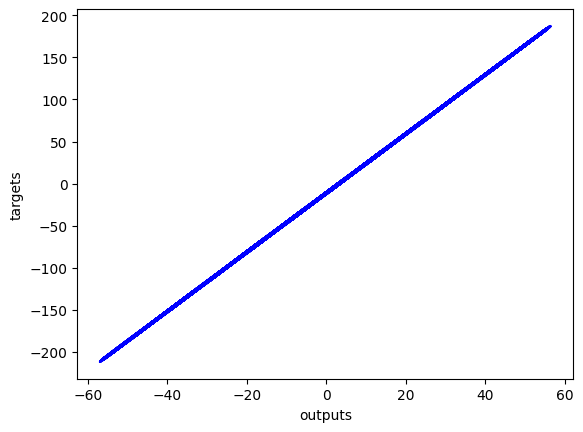

In [15]:
plt.plot(outputs, targets, color='blue')
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()